# This project predicts/analyses the enrollment count of a fictitious University

# Import Relevant Libraries

In [34]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mae
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
import time
warnings.simplefilter(action="ignore", category=FutureWarning)


# Load the Data

In [2]:
df=pd.read_csv('university_enrollment_2306.csv')
df.sample(10)

,course_id,course_type,year,enrollment_count,pre_score,post_score,pre_requirement,department
1065,1066,online,2016,251,36.11,67.0,NaN,Science
624,625,online,2015,251,88.17,84.0,Beginner,Technology
1333,1334,online,2018,246,42.63,76.0,Beginner,Math
1360,1361,online,2015,261,12.8,72.0,None,Technology
7,8,online,2018,261,76.48,88.0,None,Technology
1182,1183,classroom,2018,155,68.22,85.0,Intermediate,Science
1835,1836,online,2022,245,75.93,76.0,Beginner,Math
1410,1411,online,2014,256,94.86,98.0,None,Math
280,281,online,2020,261,17.48,76.0,None,Technology
51,52,online,2019,261,7.74,61.0,None,Technology


# Perform Data Validation

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1850 entries, 0 to 1849
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   course_id         1850 non-null   int64  
 1   course_type       1850 non-null   object 
 2   year              1850 non-null   int64  
 3   enrollment_count  1850 non-null   int64  
 4   pre_score         1850 non-null   object 
 5   post_score        1665 non-null   float64
 6   pre_requirement   1761 non-null   object 
 7   department        1850 non-null   object 
dtypes: float64(1), int64(3), object(4)
memory usage: 115.8+ KB


In [4]:
# Check for null Values
post_score_na_count=df['post_score'].isna().sum()
pre_requirement_na_count=df['pre_requirement'].isna().sum()
print(f'The are {post_score_na_count} null values  in the post_score column')
print(f'The are {pre_requirement_na_count} null values in the pre_requirement column')

The are 185 null values  in the post_score column
The are 89 null values in the pre_requirement column


In [5]:
# Replace null Values with appropriate values
df['post_score']=df.post_score.fillna(0)
df['pre_requirement']=df.pre_requirement.fillna('None')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1850 entries, 0 to 1849
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   course_id         1850 non-null   int64  
 1   course_type       1850 non-null   object 
 2   year              1850 non-null   int64  
 3   enrollment_count  1850 non-null   int64  
 4   pre_score         1850 non-null   object 
 5   post_score        1850 non-null   float64
 6   pre_requirement   1850 non-null   object 
 7   department        1850 non-null   object 
dtypes: float64(1), int64(3), object(4)
memory usage: 115.8+ KB


In [7]:
df.nunique()

course_id           1850
course_type            2
year                  12
enrollment_count      45
pre_score           1594
post_score            54
pre_requirement        3
department             5
dtype: int64

In [8]:
# Replace Mathemamatics with with since they mean same thing
df['department']=df['department'].replace({'Math':'Mathematics'})

In [9]:
# From inpection 'pre_score column has "- " in column'
#replace '_' with 0
df.loc[df['pre_score'] == '-', 'pre_score'] = 0

In [10]:
df.sample(10)

,course_id,course_type,year,enrollment_count,pre_score,post_score,pre_requirement,department
1344,1345,online,2012,257,94.9,80.0,None,Mathematics
832,833,online,2020,261,65.34,72.0,None,Technology
291,292,online,2021,241,51.62,75.0,Beginner,Science
46,47,online,2020,251,38.22,63.0,Beginner,Technology
517,518,online,2013,255,56.13,85.0,None,Mathematics
1059,1060,classroom,2012,175,58.31,76.0,None,Science
1060,1061,online,2018,256,10.7,79.0,None,Mathematics
1334,1335,online,2015,256,16.38,57.0,Beginner,Engineering
423,424,online,2021,256,28.66,68.0,None,Mathematics
1201,1202,classroom,2014,170,45.14,80.0,Intermediate,Engineering


# Perform Data Exploratory Analysis

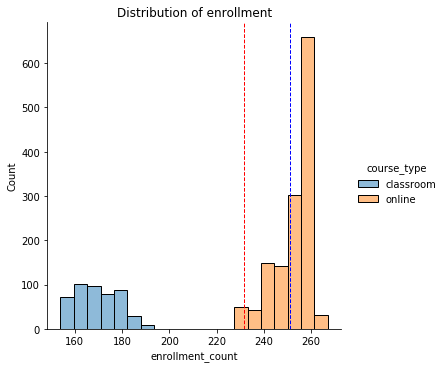

In [11]:
# Distribution of enrollment_count'
sns.displot(x='enrollment_count', data=df, hue='course_type', bins=20)
plt.axvline(df.enrollment_count.mean(), color='r', linestyle='dashed', linewidth=1)
plt.axvline(df.enrollment_count.median(), color='b', linestyle='dashed', linewidth=1)
plt.title('Distribution of enrollment');


Analyzing the enrollment count, our graphical representation reveals an intriguing bimodal distribution. Notably, the peak enrollment numbers are attributed to online courses, suggesting a robust digital presence. However, the university's performance in classroom-based enrollments is less promising, with figures consistently below 200.

To elaborate further, classroom enrollments are registering below the 200 mark, while online enrollments hover slightly above 250. This discrepancy underscores the need for focused efforts to bridge this enrollment gap effectively.


 Average enrollment count for Online Courses:  253
 Average enrollment count for Classroom Courses:  170


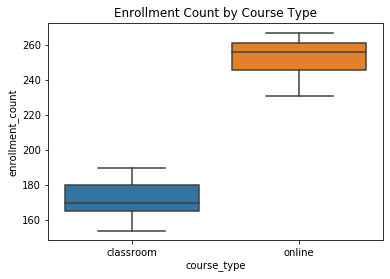

In [12]:
#Visualize with boxplots
sns.boxplot(x='course_type', y='enrollment_count', data=df);
plt.title('Enrollment Count by Course Type')

# Print the mean enrollment for each course type
classroom = df[df['course_type'] == 'classroom']['enrollment_count'].mean()
online = df[df['course_type'] == 'online']['enrollment_count'].mean()
print(f" Average enrollment count for Online Courses: {online: .0f}")
print(f" Average enrollment count for Classroom Courses: {classroom: .0f}")


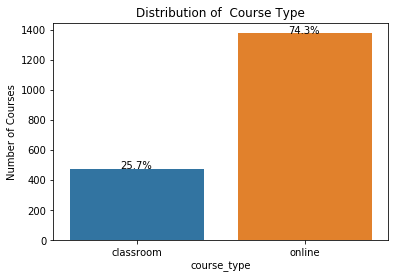

In [13]:
# Verify which course type has observation
ax=sns.countplot(data=df, x='course_type')
plt.title('Distribution of  Course Type')
plt.ylabel('Number of Courses')

total = len(df['course_type'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width()-0.5
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y))

plt.show();

as shown in the graph, the online courses makes up about 74% of the total courses, leaving about 26% for classroom courses. Clearly there is an imbalance in the representation of the courses. This may affect the result of the model and an inaccurate conclusion may result. For future analyis , the observation should be balanced so obtain an accurate model. For our purpose the data is used  'as-is'.This observation may be due to the fact that the number of enrollment online classes are not retricted by a physical classroom size thus the univeristy created moreonline classes.

## Predictive Modeling

### Linear Regression

In [14]:
df.head()

,course_id,course_type,year,enrollment_count,pre_score,post_score,pre_requirement,department
0,1,classroom,2018,165,28.14,73.0,Beginner,Science
1,2,classroom,2020,175,79.68,86.0,None,Science
2,3,online,2016,257,57.24,80.0,None,Mathematics
3,4,online,2013,251,97.67,75.0,Beginner,Technology
4,5,classroom,2019,165,39.75,76.0,Beginner,Science


In [15]:
#Encode Categorical features
df_encoded = pd.get_dummies(df, columns=['course_type', 'pre_requirement', 'department'])

In [16]:
# start time for the model exeution
reg_start_time=time.time()

In [17]:
# Separate features (X) and the target variable (y)
X=df_encoded.drop(columns=['enrollment_count','course_id'])
y=df_encoded['enrollment_count']

In [18]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
#instantiate a linear regression object
linear_model = LinearRegression()

In [20]:
# Train the model
linear_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:
# Predict on the test set
y_pred =linear_model.predict(X_test)
y_pred[:5]

array([240.97459333, 180.06724936, 250.96698407, 260.96869137,
       256.06810636])

In [22]:
## Check Performance Parameter
# stop time for model execution
reg_stop_time=time.time()
# get the time elapse
reg_elapse_time=reg_stop_time-reg_start_time
# print performance metrics
print(f" Time elaspse in seconds for Linear regression model execution: {reg_elapse_time}")
root_mean = np.sqrt(mae(y_test, y_pred))
print(f'Mean Absolute Error: {root_mean : .4f}')
r_squared = r2_score(y_test, y_pred)
print(f'The R-squared: {r_squared: .4f}')

 Time elaspse in seconds for Linear regression model execution: 3.122400999069214
Mean Absolute Error:  0.3149
The R-squared:  0.9999


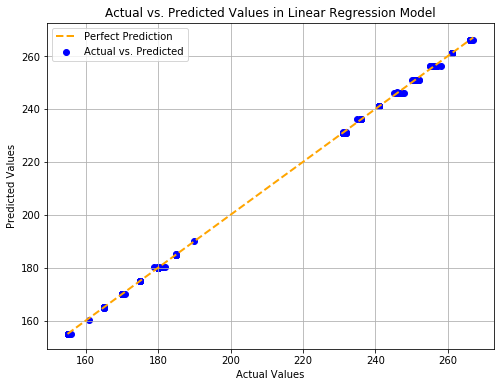

In [23]:
# Visualize the performance
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, c='blue', label='Actual vs. Predicted', marker='o')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='orange', linewidth=2, label='Perfect Prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values in Linear Regression Model')
plt.legend()
plt.grid(True)
plt.show()

### Random Forest Regressor Model

In [24]:
# start time for model execution
forest_start_time=time.time()

In [25]:
# Choose a more comparison model (e.g., Random Forest Regressor)
model_Forest = RandomForestRegressor(n_estimators=100, random_state=42)

In [26]:
# Train the model
model_Forest.fit(X_train, y_train)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [35]:
# Predict on the test set
y_pred_Forest = model_Forest.predict(X_test)

C:\Users\oladu\Anaconda3\lib\site-packages\sklearn\ensemble\base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)


In [28]:
# stop time for model execution
forest_stop_time=time.time()

In [29]:
# get the time elapse
forest_elapse_time=forest_stop_time-forest_start_time

In [30]:
# print performance metrics
print(f" Time elaspse in seconds for Random Forest model execution: {forest_elapse_time}")
rmse_Forest = np.sqrt(mae(y_test, y_pred_Forest))
print(f'Mean Absolute Error: {rmse_Forest}')
r_squared_Forest = r2_score(y_test, y_pred_Forest)
print(f'The R-squared: {r_squared_Forest: .4f}')

 Time elaspse in seconds for Random Forest model execution: 0.7942550182342529
Mean Absolute Error: 0.3543238555256964
The R-squared:  0.9999


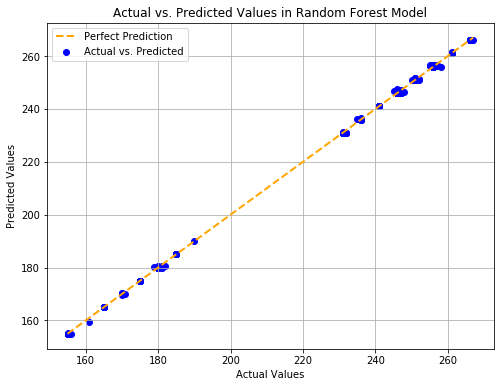

In [31]:
# Visualiza the performance of the model
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_Forest, c='blue', label='Actual vs. Predicted', marker='o')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='orange', linewidth=2, label='Perfect Prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values in Random Forest Model')
plt.legend()
plt.grid(True)
plt.show()

# Compare the Performance of the Two Models

Text(0, 0.5, 'RMSE')

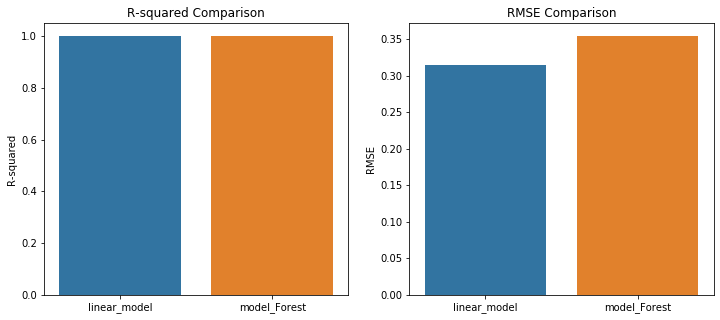

In [32]:
# Create visualizations
plt.figure(figsize=(12, 5))

# R-squared comparison
plt.subplot(1, 2, 1)
sns.barplot(x=['linear_model', 'model_Forest'], y=[ r_squared, r_squared_Forest])
plt.title('R-squared Comparison')
plt.ylabel('R-squared')

# RMSE comparison
plt.subplot(1, 2, 2)
sns.barplot(x=['linear_model', 'model_Forest'], y=[root_mean, rmse_Forest])
plt.title('RMSE Comparison')
plt.ylabel('RMSE')



Text(0, 0.5, 'Elapse Time')

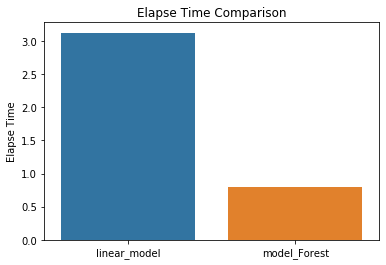

In [33]:
sns.barplot(x=['linear_model', 'model_Forest'], y=[reg_elapse_time, forest_elapse_time])
plt.title('Elapse Time Comparison')
plt.ylabel('Elapse Time')